# Lecture Notes 14

## Reading excel

In [1]:
import pandas as pd

In [2]:
pd.read_csv('/home/python-lll/Downloads/survey-data - person.csv')

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [3]:
pd.read_excel('/home/python-lll/Downloads/survey-data.xlsx')

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


* Use option `sheet_name=None` to get all tabs as a dictionary

In [4]:
pd.read_excel('/home/python-lll/Downloads/survey-data.xlsx', sheet_name=None)

{'person':          id   personal    family
 0      dyer    William      Dyer
 1        pb      Frank   Pabodie
 2      lake   Anderson      Lake
 3       roe  Valentina   Roerich
 4  danforth      Frank  Danforth,
 'site':     name    lat    long
 0   DR-1 -49.85 -128.57
 1   DR-3 -47.15 -126.72
 2  MSK-4 -48.87 -123.40,
 'survey':     taken person quant  reading
 0     619   dyer   rad     9.82
 1     619   dyer   sal     0.13
 2     622   dyer   rad     7.80
 3     622   dyer   sal     0.09
 4     734     pb   rad     8.41
 5     734   lake   sal     0.05
 6     734     pb  temp   -21.50
 7     735     pb   rad     7.22
 8     735    NaN   sal     0.06
 9     735    NaN  temp   -26.00
 10    751     pb   rad     4.35
 11    751     pb  temp   -18.50
 12    751   lake   sal     0.10
 13    752   lake   rad     2.19
 14    752   lake   sal     0.09
 15    752   lake  temp   -16.00
 16    752    roe   sal    41.60
 17    837   lake   rad     1.46
 18    837   lake   sal     0.21
 19   

In [5]:
dfs = pd.read_excel('/home/python-lll/Downloads/survey-data.xlsx', sheet_name=None)
dfs['person']

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


## Reading google spreadsheets

* Two steps: download and read from local disk witn `read_excel`
* One step: Modify url with to end with `.../export?format=xlsx` and pass to `read_excel`


In [47]:
dfs = pd.read_excel('https://docs.google.com/spreadsheets/d/1VVw6O5ncoc2R-bBvu1Xc0PqylA6tKW2pyh5bDHhE_r8/export?format=xlsx', sheet_name=None)
dfs['person']

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [48]:
dfs.keys()

dict_keys(['person', 'site', 'survey', 'visited'])

In [49]:
person = dfs['person']
site = dfs['site']
survey = dfs['survey']
visited = dfs['visited']

In [50]:
person

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


## Common operations with dataframes
### Select columns

In [51]:
person[['personal', 'family']]

,personal,family
0,William,Dyer
1,Frank,Pabodie
2,Anderson,Lake
3,Valentina,Roerich
4,Frank,Danforth


### Get unique values in a column

In [11]:
survey # which are the unique quantities we measure?

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [12]:
survey['quant']

0      rad
1      sal
2      rad
3      sal
4      rad
5      sal
6     temp
7      rad
8      sal
9     temp
10     rad
11    temp
12     sal
13     rad
14     sal
15    temp
16     sal
17     rad
18     sal
19     sal
20     rad
Name: quant, dtype: object

* Using the built-in `set`
* Using the pandas Series method `unique`

In [13]:
set(survey['quant'])

{'rad', 'sal', 'temp'}

In [14]:
survey['quant'].unique()

array(['rad', 'sal', 'temp'], dtype=object)

* If we want to know how the values are distributed

In [15]:
survey['quant'].value_counts()

sal     9
rad     8
temp    4
Name: quant, dtype: int64

### sorting by a column

In [16]:
person

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [17]:
person.sort_values('family')

,id,personal,family
4,danforth,Frank,Danforth
0,dyer,William,Dyer
2,lake,Anderson,Lake
1,pb,Frank,Pabodie
3,roe,Valentina,Roerich


### filtering with boolean Series

In [18]:
visited

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaT
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [19]:
at_dr_1 = visited['site'] == 'DR-1'
at_dr_1

0     True
1     True
2    False
3    False
4    False
5    False
6    False
7     True
Name: site, dtype: bool

In [20]:
visited[at_dr_1]

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
7,844,DR-1,1932-03-22


* Combining with logical operators
    * `|` for OR
    * `&` for AND

In [21]:
at_dr_1_or_3 = (visited['site'] == 'DR-1') | (visited['site'] == 'DR-3')
at_dr_1_or_3

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
Name: site, dtype: bool

In [22]:
visited[at_dr_1_or_3]

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaT
7,844,DR-1,1932-03-22


In [23]:
'DR-3'.startswith('DR')

True

In [24]:
at_dr = visited['site'].str.startswith('DR')
at_dr

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
Name: site, dtype: bool

In [25]:
visited[at_dr]

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaT
7,844,DR-1,1932-03-22


### select all record from survey with salinity values outsited [0, 1]

In [26]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [27]:
sal = survey['quant'] == 'sal'
sal

0     False
1      True
2     False
3      True
4     False
5      True
6     False
7     False
8      True
9     False
10    False
11    False
12     True
13    False
14     True
15    False
16     True
17    False
18     True
19     True
20    False
Name: quant, dtype: bool

In [28]:
out_of_range = (survey['reading'] > 1) | (survey['reading'] < 0) # | is a logical OR operation
out_of_range

0      True
1     False
2      True
3     False
4      True
5     False
6      True
7      True
8     False
9      True
10     True
11     True
12    False
13     True
14    False
15     True
16     True
17     True
18    False
19     True
20     True
Name: reading, dtype: bool

In [29]:
sal & out_of_range  # & is a logical AND operation

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19     True
20    False
dtype: bool

In [30]:
survey[sal & out_of_range]

,taken,person,quant,reading
16,752,roe,sal,41.6
19,837,roe,sal,22.5


### Add new columns
#### Provide temp readings in Fahrenheit

In [31]:
fahrenheit = survey[survey['quant'] == 'temp']['reading']*9/5 + 32
fahrenheit

6     -6.7
9    -14.8
11    -1.3
15     3.2
Name: reading, dtype: float64

In [32]:
survey['fahrenheit'] = fahrenheit

In [33]:
survey

,taken,person,quant,reading,fahrenheit
0,619,dyer,rad,9.82,NaN
1,619,dyer,sal,0.13,NaN
2,622,dyer,rad,7.80,NaN
3,622,dyer,sal,0.09,NaN
4,734,pb,rad,8.41,NaN
5,734,lake,sal,0.05,NaN
6,734,pb,temp,-21.50,-6.7
7,735,pb,rad,7.22,NaN
8,735,NaN,sal,0.06,NaN
9,735,NaN,temp,-26.00,-14.8


### Missing data

In [34]:
visited  # find missing data

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaT
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [35]:
missing_date = visited['dated'].isna() # is not valid 
missing_date

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
Name: dated, dtype: bool

In [36]:
visited[missing_date]

,id,site,dated
5,752,DR-3,NaT


### what is the most recent reading

In [37]:
visited

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaT
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [38]:
visited.sort_values('dated', ascending=False)

,id,site,dated
7,844,DR-1,1932-03-22
6,837,MSK-4,1932-01-14
4,751,DR-3,1930-02-26
3,735,DR-3,1930-01-12
2,734,DR-3,1930-01-07
1,622,DR-1,1927-02-10
0,619,DR-1,1927-02-08
5,752,DR-3,NaT


In [39]:
visited.sort_values('dated', ascending=False).head(1)

,id,site,dated
7,844,DR-1,1932-03-22


### operation with grouping
#### what is the average measurement for each person and quantity

In [40]:
survey

,taken,person,quant,reading,fahrenheit
0,619,dyer,rad,9.82,NaN
1,619,dyer,sal,0.13,NaN
2,622,dyer,rad,7.80,NaN
3,622,dyer,sal,0.09,NaN
4,734,pb,rad,8.41,NaN
5,734,lake,sal,0.05,NaN
6,734,pb,temp,-21.50,-6.7
7,735,pb,rad,7.22,NaN
8,735,NaN,sal,0.06,NaN
9,735,NaN,temp,-26.00,-14.8


In [41]:
survey.groupby('quant')['reading'].mean().round(2)

quant
rad      6.56
sal      7.20
temp   -20.50
Name: reading, dtype: float64

In [42]:
survey.groupby(['person', 'quant'])['reading'].mean().round(2)

person  quant
dyer    rad       8.81
        sal       0.11
lake    rad       1.82
        sal       0.11
        temp    -16.00
pb      rad       6.66
        temp    -20.00
roe     rad      11.25
        sal      32.05
Name: reading, dtype: float64

## plotting reviewed
### with arrays

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
x = np.arange(0, 1, .1)
y1 = x**2
y2 = x**3

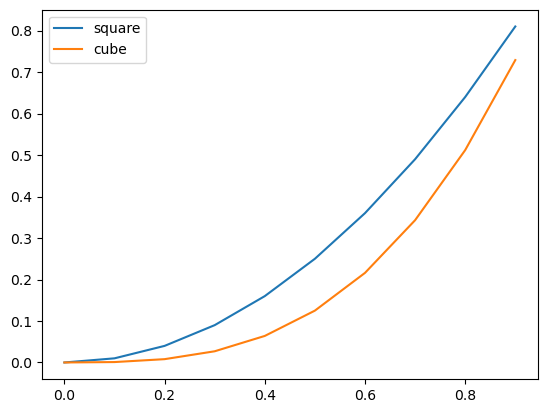

In [45]:
plt.plot(x, y1, label='square')
plt.plot(x, y2, label='cube')
plt.legend()

### with dataframes

<Axes: >

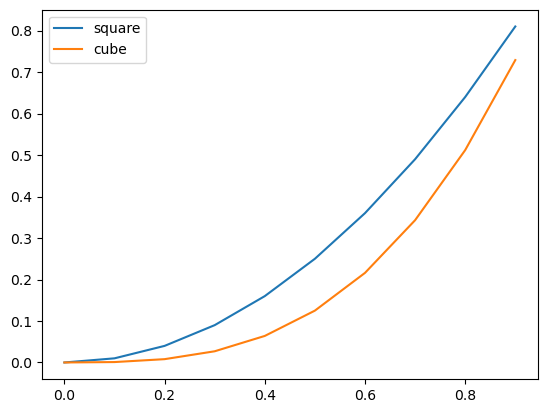

In [46]:
pd.DataFrame({'square': y1, 'cube': y2}, index=x).plot()